In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from skimage import color
from skimage.filters import try_all_threshold
from skimage.filters import threshold_otsu
from skimage.filters import threshold_local

from skimage.filters import sobel
from skimage.filters import gaussian
from skimage import exposure

from skimage.transform import rotate
from skimage.transform import rescale
from skimage.transform import resize
from skimage import morphology

from skimage.restoration import inpaint
from skimage.util import random_noise
from skimage.restoration import denoise_tv_chambolle
from skimage.restoration import denoise_bilateral

from skimage.segmentation import slic
from skimage.color import label2rgb

from skimage import measure

from skimage.feature import canny
from skimage.feature import corner_harris,corner_peaks



# Method defination

In [49]:
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()
    
def plot_comparison(original, filtered, title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 6), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(title_filtered)
    ax2.axis('off')
    
def get_mask(image):
    ''' Creates mask with three defect regions '''
    mask = np.zeros(image.shape[:-1])
    mask[101:106, 0:240] = 1
    mask[152:154, 0:60] = 1
    mask[153:155, 60:100] = 1
    mask[154:156, 100:120] = 1
    mask[155:156, 120:140] = 1
    mask[212:217, 0:150] = 1
    mask[217:222, 150:256] = 1
    return mask

def show_image_with_corners(image, coords, title="Corners detected"):
    plt.imshow(image, interpolation='nearest', cmap='gray')
    plt.title(title)
    plt.plot(coords[:, 1], coords[:, 0], '+r', markersize=15)
    plt.axis('off')
    plt.show()

# Import image

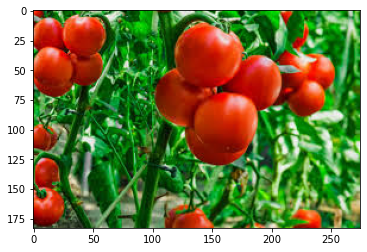

In [3]:
data = plt.imread('img_p1_72.jpeg')
plt.imshow(data)
plt.show()

# Convert to grayscale

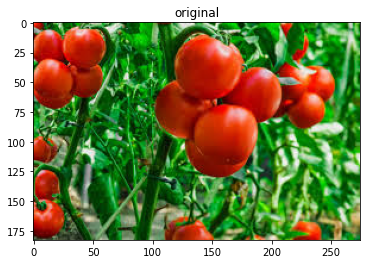

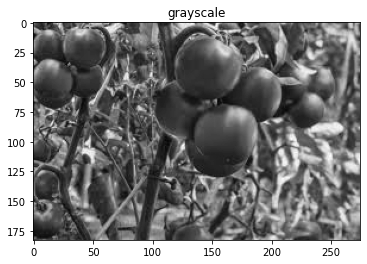

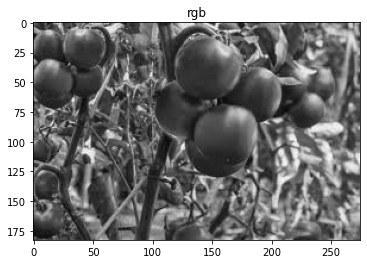

In [4]:
grayscale = color.rgb2gray(data)
rgb = color.gray2rgb(grayscale)

plt.imshow(data , cmap='gray')
plt.title('original')
plt.show()

plt.imshow(grayscale , cmap='gray')
plt.title('grayscale')
plt.show()

plt.imshow(rgb)
plt.title('rgb')
plt.show()

In [5]:
data.shape

(183, 275, 3)

In [6]:
 # Obtaining the red values of the image
red = data[:, :, 0]
# Obtaining the green values of the image
green = data[:, :, 1]
# Obtaining the blue values of the image
blue = data[:, :, 2]

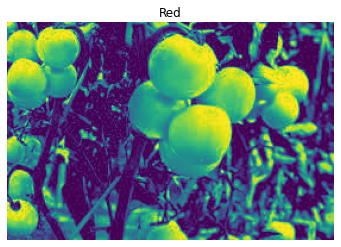

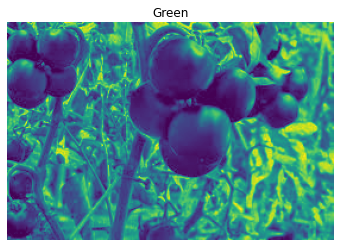

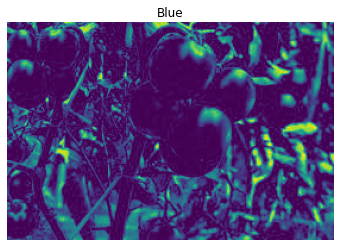

In [7]:
plt.imshow(red)
plt.title('Red')
plt.axis('off')
plt.show()

plt.imshow(green)
plt.title('Green')
plt.axis('off')
plt.show()

plt.imshow(blue)
plt.title('Blue')
plt.axis('off')
plt.show()

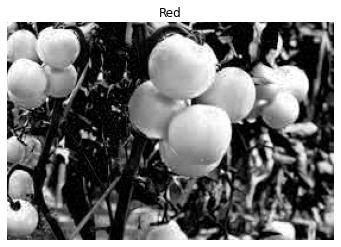

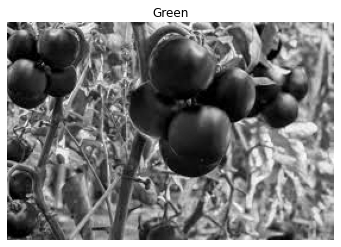

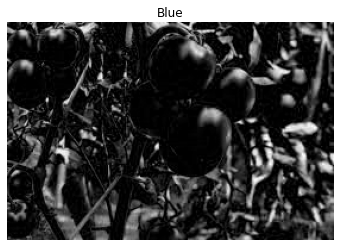

In [8]:
plt.imshow(red, cmap="gray")
plt.title('Red')
plt.axis('off')
plt.show()

plt.imshow(green, cmap="gray")
plt.title('Green')
plt.axis('off')
plt.show()

plt.imshow(blue, cmap="gray")
plt.title('Blue')
plt.axis('off')
plt.show()

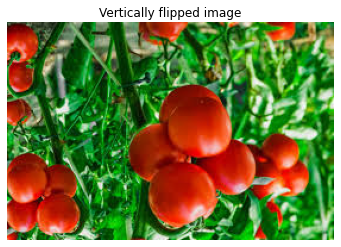

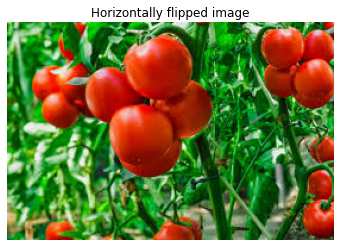

In [9]:
vertically_flipped = np.flipud(data)
show_image(vertically_flipped, 'Vertically flipped image')
horizontally_flipped = np.fliplr(data)
show_image(horizontally_flipped, 'Horizontally flipped image')

# Histrogram plot

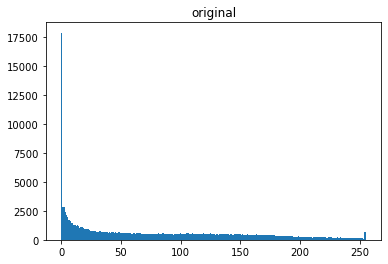

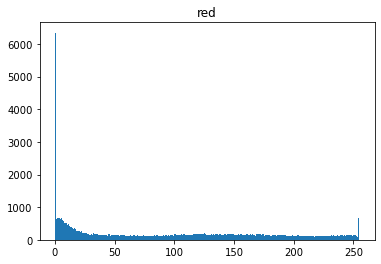

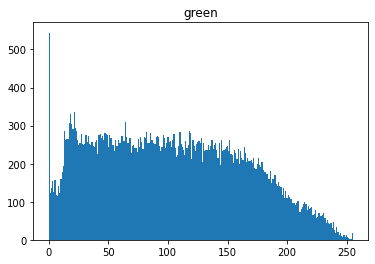

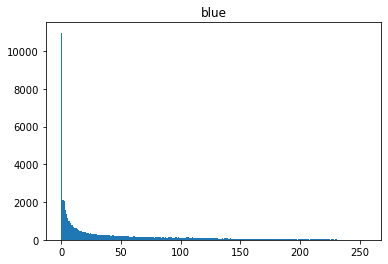

In [10]:
plt.hist(data.ravel(), bins=256)
plt.title('original')
plt.show()

plt.hist(red.ravel(), bins=256)
plt.title('red')
plt.show()

plt.hist(green.ravel(), bins=256)
plt.title('green')
plt.show()

plt.hist(blue.ravel(), bins=256)
plt.title('blue')
plt.show()

# Grayscale with threshold

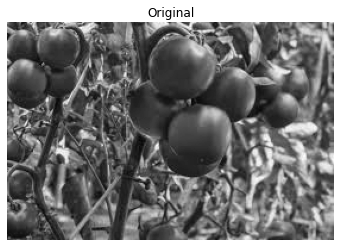

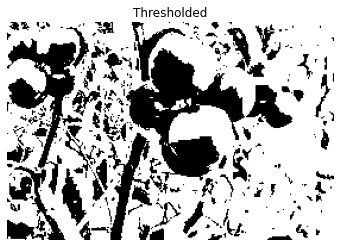

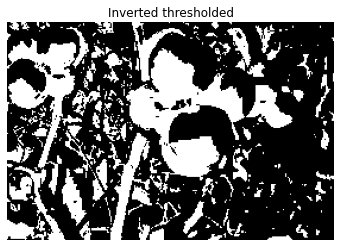

In [11]:
# Obtain the optimal threshold value
thresh = 0.25

data2 = grayscale
# Apply thresholding to the image
binary = data2 > thresh
# Show the original and thresholded
show_image(data2, 'Original')
show_image(binary, 'Thresholded')

inverted_binary = data2 <= thresh
# Show the thresholded
show_image(inverted_binary,
           'Inverted thresholded')

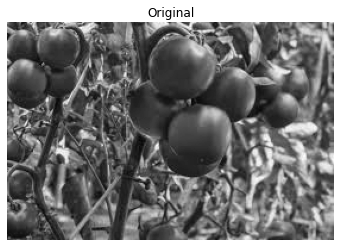

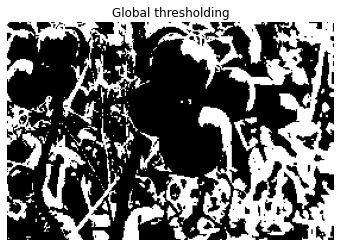

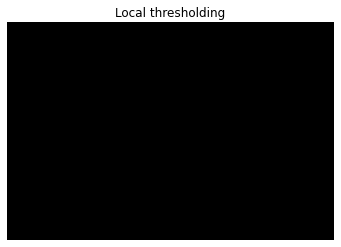

In [12]:
# Obtain the optimal threshold value
thresh = threshold_otsu(data2)
# Apply thresholding to the image
binary_global = data2 > thresh
show_image(data2, 'Original')
show_image(binary_global, 'Global thresholding')

block_size = 3
# Obtain the optimal local thresholding
local_thresh = threshold_local(data2, block_size, offset=10)
# Apply local thresholding and obtain the binary image
binary_local = data2 > local_thresh
show_image(binary_local, 'Local thresholding')

# Edge detection with sobel

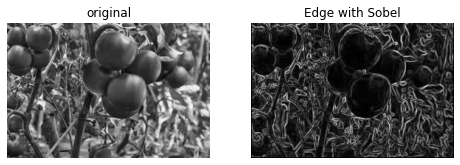

In [13]:
# Apply edge detection filter
edge_sobel = sobel(data2)
# Show original and resulting image to compare
plot_comparison(data2, edge_sobel, "Edge with Sobel")

# Blurred with Gaussian filter

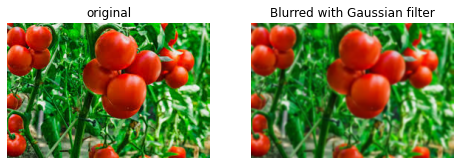

In [14]:
# Apply blur with gaussian
gaussian_image = gaussian(data, multichannel=True)
# Show original and resulting image to compare
plot_comparison(data, gaussian_image, "Blurred with Gaussian filter")

# Contrast

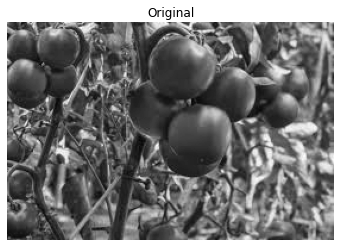

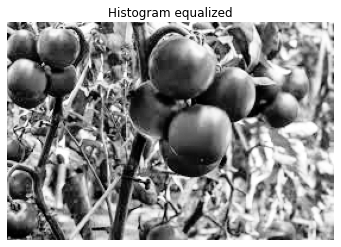

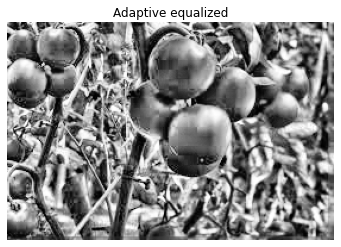

In [15]:
# Obtain the equalized image (Contrast)
image_eq = exposure.equalize_hist(data2)
# Show original and result
show_image(data2, 'Original')
show_image(image_eq, 'Histogram equalized')

# Apply adaptive Equalization
image_adapteq = exposure.equalize_adapthist(data2, clip_limit=0.03)
show_image(image_adapteq, 'Adaptive equalized')

# Rotate image

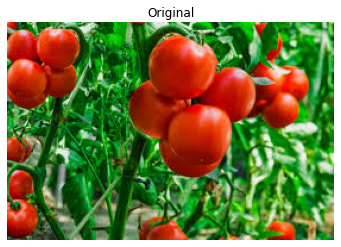

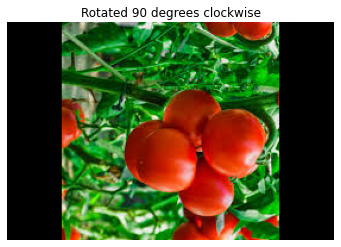

In [16]:
# Rotate the image 90 degrees clockwise
image_rotated = rotate(data, -90)
show_image(data, 'Original')
show_image(image_rotated, 'Rotated 90 degrees clockwise')

# Rescale image

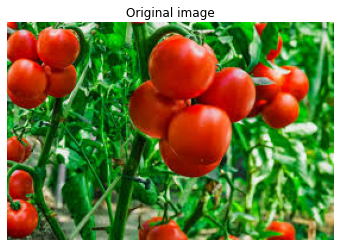

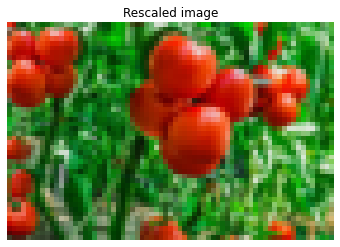

In [17]:
# Rescale the image to be 4 times smaller
image_rescaled = rescale(data, 1/4, anti_aliasing=True, multichannel=True)
show_image(data, 'Original image')
show_image(image_rescaled, 'Rescaled image')

# Resize image

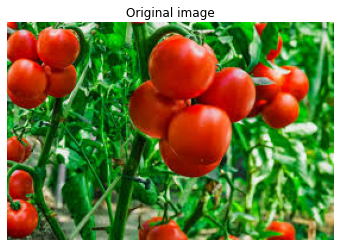

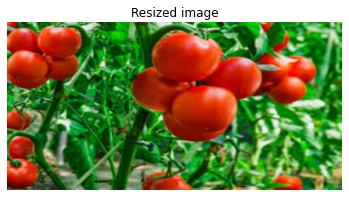

In [18]:
# Height and width to resize
height = 1500
width = 3000
# Resize image
image_resized = resize(data, (height, width), anti_aliasing=True)
# Show the original and resulting images
show_image(data, 'Original image')
show_image(image_resized, 'Resized image')

# Restore defected image

In [19]:
mask2 = np.zeros(data.shape[:-1])

In [20]:
mask2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
mask2[101:106, 0:240] = 1
mask2[152:154, 0:60] = 1
mask2[153:155, 60:100] = 1
mask2[154:156, 100:120] = 1
mask2[155:156, 120:140] = 1
mask2[212:217, 0:150] = 1
mask2[217:222, 150:256] = 1

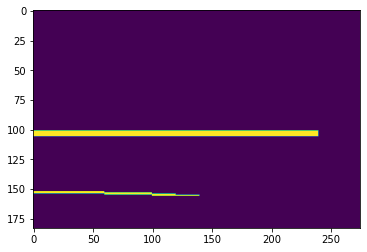

In [22]:
plt.imshow(data)
plt.imshow(mask2)
plt.show()

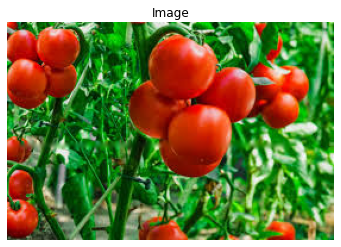

In [25]:
# Obtain the mask
mask = get_mask(data)

# Apply inpainting to the damaged image using the mask
restored_image = inpaint.inpaint_biharmonic(data, mask, multichannel=True)

# Show the resulting image
show_image(restored_image)

# Add noise and remove noise

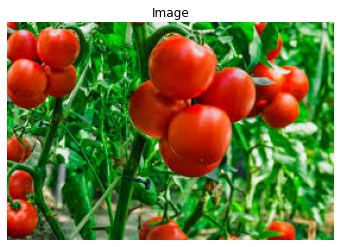

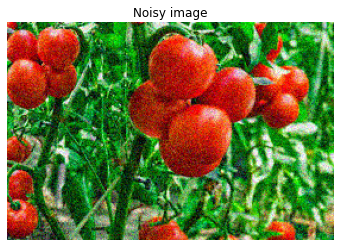

In [26]:
# Add noise to the image
noisy_image = random_noise(data)
# Show original and resulting image
show_image(data)
show_image(noisy_image, 'Noisy image')

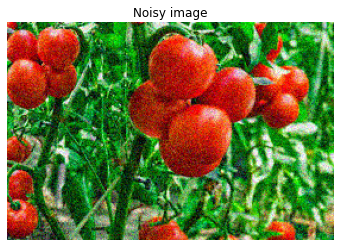

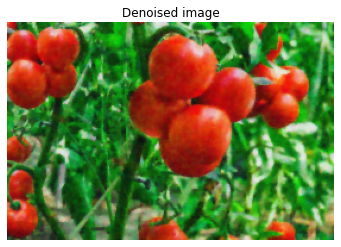

In [27]:
# Apply total variation filter denoising
denoised_image = denoise_tv_chambolle(noisy_image,
                                      weight=0.1,
                                      multichannel=True)
# Show denoised image
show_image(noisy_image, 'Noisy image')
show_image(denoised_image, 'Denoised image')

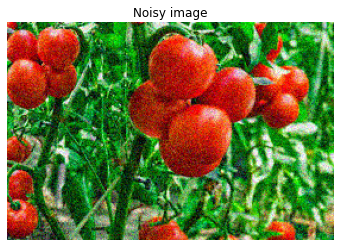

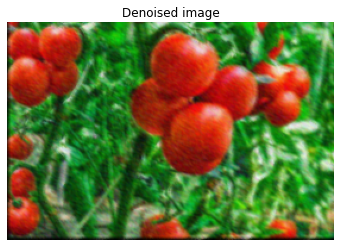

In [28]:
# Apply bilateral filter denoising
denoised_image = denoise_bilateral(noisy_image, multichannel=True)
# Show original and resulting images
show_image(noisy_image, 'Noisy image')
show_image(denoised_image, 'Denoised image')

# Image segmentation

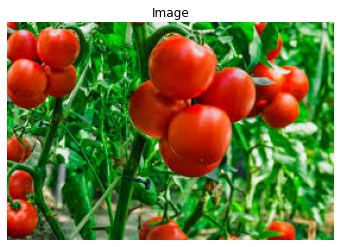

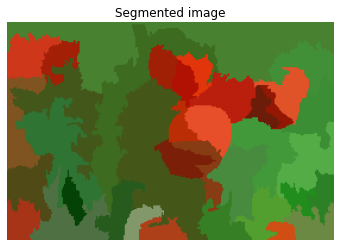

In [29]:
# Obtain the segments
segments = slic(data)
# Put segments on top of original image to compare
segmented_image = label2rgb(segments, data, kind='avg')
show_image(data)
show_image(segmented_image, "Segmented image")

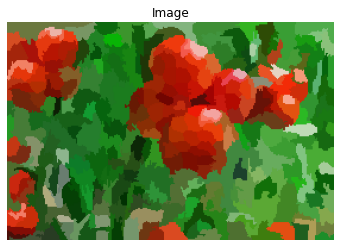

In [30]:
# Obtain the segmentation with 300 regions
segments = slic(data, n_segments= 500)
# Put segments on top of original image to compare
segmented_image = label2rgb(segments, data, kind='avg')
show_image(segmented_image)

# Find contours

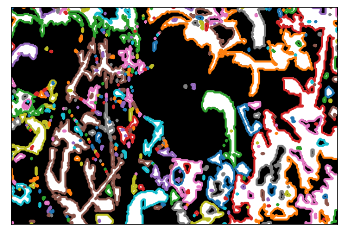

In [31]:
# Find contours at a constant value of 0.8
contours = measure.find_contours(binary_global, 0.5)

# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(binary_global, cmap=plt.cm.gray)

for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [32]:
 for contour in contours:
    print(contour.shape)

(4, 2)
(4, 2)
(441, 2)
(3, 2)
(34, 2)
(5, 2)
(23, 2)
(6, 2)
(19, 2)
(63, 2)
(3, 2)
(820, 2)
(5, 2)
(4, 2)
(13, 2)
(41, 2)
(87, 2)
(118, 2)
(4, 2)
(5, 2)
(9, 2)
(4, 2)
(31, 2)
(753, 2)
(25, 2)
(3, 2)
(9, 2)
(11, 2)
(5, 2)
(21, 2)
(19, 2)
(5, 2)
(83, 2)
(9, 2)
(5, 2)
(15, 2)
(7, 2)
(5, 2)
(5, 2)
(5, 2)
(19, 2)
(15, 2)
(5, 2)
(5, 2)
(13, 2)
(9, 2)
(5, 2)
(19, 2)
(23, 2)
(7, 2)
(5, 2)
(10, 2)
(15, 2)
(17, 2)
(5, 2)
(89, 2)
(5, 2)
(5, 2)
(9, 2)
(5, 2)
(11, 2)
(9, 2)
(13, 2)
(5, 2)
(5, 2)
(5, 2)
(5, 2)
(9, 2)
(5, 2)
(5, 2)
(5, 2)
(15, 2)
(29, 2)
(191, 2)
(5, 2)
(477, 2)
(5, 2)
(5, 2)
(4, 2)
(7, 2)
(23, 2)
(9, 2)
(17, 2)
(12, 2)
(87, 2)
(7, 2)
(131, 2)
(6, 2)
(9, 2)
(5, 2)
(7, 2)
(9, 2)
(9, 2)
(7, 2)
(11, 2)
(7, 2)
(5, 2)
(5, 2)
(9, 2)
(5, 2)
(5, 2)
(11, 2)
(14, 2)
(7, 2)
(5, 2)
(5, 2)
(33, 2)
(5, 2)
(11, 2)
(5, 2)
(7, 2)
(11, 2)
(9, 2)
(7, 2)
(7, 2)
(33, 2)
(7, 2)
(5, 2)
(7, 2)
(5, 2)
(5, 2)
(7, 2)
(15, 2)
(5, 2)
(9, 2)
(12, 2)
(16, 2)
(7, 2)
(67, 2)
(7, 2)
(7, 2)
(5, 2)
(5, 2)
(5, 2)
(17, 2

# Edge detection with canny

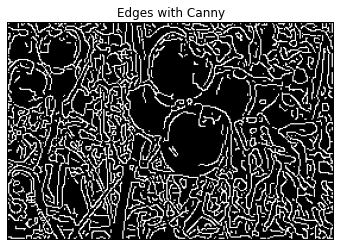

In [37]:
# Convert image to grayscale
data3 = color.rgb2gray(data)
# Apply Canny detector
canny_edges = canny(data3)
# Show resulted image with edges
show_image(canny_edges, "Edges with Canny")

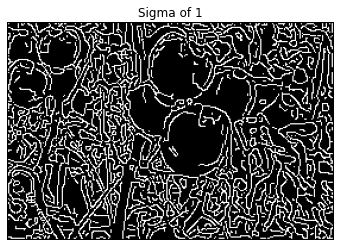

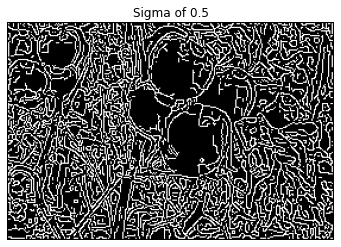

In [38]:
# Apply Canny detector with a sigma of 0.5
canny_edges_0_5 = canny(data3, sigma=0.5)
# Show resulted images with edges
show_image(canny_edges, "Sigma of 1")
show_image(canny_edges_0_5, "Sigma of 0.5")

# Corner detection

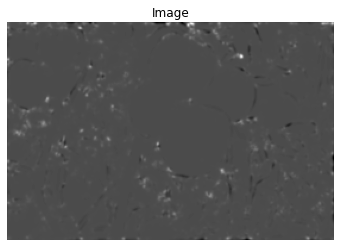

In [40]:
# Apply the Harris corner detector on the image
measure_image = corner_harris(data3)
# Show the Harris response image
show_image(measure_image)

In [44]:
# Finds the coordinates of the corners
coords = corner_peaks(corner_harris(data3), min_distance=5)
print("A total of", len(coords), "corners were detected.")

A total of 59 corners were detected.


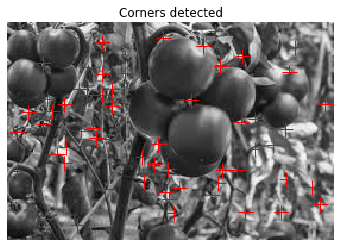

In [50]:
 # Show image with marks in detected corners
show_image_with_corners(data3, coords)